# Inspect viral infection progression

We do this based on MCP and psbA expression derived from channels 4 (TMR) and 11 (Cy5)

In [155]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
# %load common_.py
from common import *

In [157]:
from ehv import load
from pathlib import Path
import flowkit

In [158]:
df = load.load_raw_ideas_dir(
    Path("/data/weizmann/EhV/high_time_res"), 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/representations/ideas_features/"), 
    "ALL", 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/cell_populations/manual_gating/"))

df = load.remove_unwanted_features(df)
df = load.tag_columns(df)

In [159]:
df.shape

(2352327, 127)

In [107]:
df = df[df["meta_label_COI"] == True]

In [109]:
xform = flowkit.transforms.LogicleTransform('logicle', param_t=10000, param_w=0.5, param_m=4.5, param_a=0)
samples = []
for (t_idx, r_idx), gdf in df[df["meta_group"] == "High"].groupby(["meta_timepoint", "meta_replicate"]):
    sample = flowkit.Sample(gdf[["feat_Intensity_MC_Ch04", "feat_Intensity_MC_Ch11", "feat_Intensity_MC_Ch7"]])
    sample.apply_transform(xform)
    sample_df = sample.as_dataframe(source="xform").set_index(gdf.index)
    sample_df.columns = sample_df.columns.get_level_values(0)
    sample_df = pandas.concat([sample_df, gdf.filter(regex="meta_.*")], axis=1)
    samples.append(sample_df)

df_logicle = pandas.concat(samples)

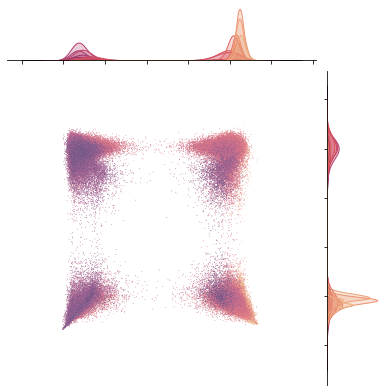

In [154]:
fig = seaborn.jointplot(
    data=df_logicle, y="feat_Intensity_MC_Ch04", x="feat_Intensity_MC_Ch11", 
    hue="meta_timepoint", hue_order=df_logicle["meta_timepoint"].unique(), 
    s=0.5, palette="flare", legend=False)
# fig.ax_joint.legend(bbox_to_anchor=(1.22, 1), loc=2, borderaxespad=0.)
fig.ax_joint.axis("off")
plt.savefig("figs/features/HTR_High_viral_progression.png", dpi=300, transparent=True, bbox_inches = "tight")